In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display
import sys
import os
import logging
sys.path.insert(0,'../src')
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100
# mpl.rcParams['text.usetex'] = True

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.cm as cm
from scipy.stats import spearmanr
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# ## for Palatino and other serif fonts use:
# #rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

from plot_utils import plot_ground_truth_heatmap, plot_spike_grps
logger = logging.getLogger("feat_viz")
logging.basicConfig(format='[%(name)s %(levelname)s] %(message)s', level=logging.INFO)

## Setup the actual simulation and slurm jobs

In [35]:
from sim_utils import load_regime_feat_sel, launch_regime_feat_sel
from sim_utils import generate_regime_info, get_regime_info, create_trial_jobs
sim_id = "main_sim_strict_1"
generate_regime_info(sim_id)
df_regime = get_regime_info(sim_id)
create_trial_jobs(sim_id)
display(df_regime)

[feat_viz INFO] sim. dir. /share/PI/sabatti/feat_viz/main_sim_strict_1
[feat_viz INFO] {'seed': 0, 'n_samps': None, 'n_samps_list': [500, 1000, 1500, 2000, 5000], 'n_trials': 50, 'x_param': {'spike_grp': ['left', 'right'], 'n_repetitions': 1, 'rel_noise_list': [1, 0.1]}, 'y_param': {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': 4, 'rel_noise_list': [0.5]}, 'target_vars': 80, 'method': None, 'graph_k': 10, 'sim_dir': '/share/PI/sabatti/feat_viz/main_sim_strict_1', 'n_var_list': [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76]}
[feat_viz INFO] Saved regimes to: /share/PI/sabatti/feat_viz/main_sim_strict_1/regime_info.csv
[feat_viz INFO] sim. dir. /share/PI/sabatti/feat_viz/main_sim_strict_1
[feat_viz INFO] sim. dir. /share/PI/sabatti/feat_viz/main_sim_strict_1
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_strict_1/regime_results/regime_0/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat

,n_samps,n_trials
0,500,50
1,1000,50
2,1500,50
3,2000,50
4,5000,50


In [27]:
from sim_utils import launch_strict_order_pipeline
launch_strict_order_pipeline(sim_id, 0, test=True)

[feat_viz INFO] sim. dir. /share/PI/sabatti/feat_viz/main_sim_strict_1
[feat_viz INFO] sim. dir. /share/PI/sabatti/feat_viz/main_sim_strict_1
[feat_viz INFO] sim. dir. /share/PI/sabatti/feat_viz/main_sim_strict_1
[feat_viz INFO] {'seed': 0, 'n_samps': 500, 'n_samps_list': [500, 1000, 1500, 2000, 5000], 'n_trials': 100, 'x_param': {'spike_grp': ['left', 'right'], 'n_repetitions': 1, 'rel_noise_list': [1, 0.1]}, 'y_param': {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': 4, 'rel_noise_list': [0.5]}, 'target_vars': 100, 'method': None, 'graph_k': 10, 'sim_dir': '/share/PI/sabatti/feat_viz/main_sim_strict_1', 'n_var_list': [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96]}
[feat_viz INFO] {'seed': 0, 'n_samps': 500, 'n_samps_list': [500, 1000, 1500, 2000, 5000], 'n_trials': 100, 'x_param': {'spike_grp': ['left', 'right'], 'n_repetitions': 1, 'rel_noise_list': [1, 0.1]}, 'y_param': {'spike_grp': ['

[feat_viz INFO] curr. score 0.842523 aug-dim: (500, 0) 
[feat_viz INFO] curr. score 0.874467 aug-dim: (500, 4) 
[feat_viz INFO] curr. score 0.889848 aug-dim: (500, 8) 
[feat_viz INFO] curr. score 0.920307 aug-dim: (500, 12) 
[feat_viz INFO] curr. score 0.940401 aug-dim: (500, 16) 
[feat_viz INFO] curr. score 0.949269 aug-dim: (500, 20) 
[feat_viz INFO] curr. score 0.950599 aug-dim: (500, 24) 
[feat_viz INFO] curr. score 0.947391 aug-dim: (500, 28) (*4 nulls)
[feat_viz INFO] curr. score 0.940156 aug-dim: (500, 32) (*8 nulls)
[feat_viz INFO] curr. score 0.934988 aug-dim: (500, 36) (*12 nulls)
[feat_viz INFO] curr. score 0.934543 aug-dim: (500, 40) (*16 nulls)
[feat_viz INFO] curr. score 0.936459 aug-dim: (500, 44) (*20 nulls)
[feat_viz INFO] curr. score 0.934773 aug-dim: (500, 48) (*24 nulls)
[feat_viz INFO] curr. score 0.931272 aug-dim: (500, 52) (*28 nulls)
[feat_viz INFO] curr. score 0.928966 aug-dim: (500, 56) (*32 nulls)
[feat_viz INFO] curr. score 0.928054 aug-dim: (500, 60) (*36 n

In [29]:
launch_strict_order_pipeline(sim_id, 4, test=True)

[feat_viz INFO] sim. dir. /share/PI/sabatti/feat_viz/main_sim_strict_1
[feat_viz INFO] sim. dir. /share/PI/sabatti/feat_viz/main_sim_strict_1
[feat_viz INFO] sim. dir. /share/PI/sabatti/feat_viz/main_sim_strict_1
[feat_viz INFO] {'seed': 0, 'n_samps': 5000, 'n_samps_list': [500, 1000, 1500, 2000, 5000], 'n_trials': 100, 'x_param': {'spike_grp': ['left', 'right'], 'n_repetitions': 1, 'rel_noise_list': [1, 0.1]}, 'y_param': {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': 4, 'rel_noise_list': [0.5]}, 'target_vars': 100, 'method': None, 'graph_k': 10, 'sim_dir': '/share/PI/sabatti/feat_viz/main_sim_strict_1', 'n_var_list': [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96]}
[feat_viz INFO] {'seed': 0, 'n_samps': 5000, 'n_samps_list': [500, 1000, 1500, 2000, 5000], 'n_trials': 100, 'x_param': {'spike_grp': ['left', 'right'], 'n_repetitions': 1, 'rel_noise_list': [1, 0.1]}, 'y_param': {'spike_grp': 

[feat_viz INFO] curr. score 0.849072 aug-dim: (5000, 0) 
[feat_viz INFO] curr. score 0.870995 aug-dim: (5000, 4) 
[feat_viz INFO] curr. score 0.895045 aug-dim: (5000, 8) 
[feat_viz INFO] curr. score 0.927153 aug-dim: (5000, 12) 
[feat_viz INFO] curr. score 0.944424 aug-dim: (5000, 16) 
[feat_viz INFO] curr. score 0.948572 aug-dim: (5000, 20) 
[feat_viz INFO] curr. score 0.955170 aug-dim: (5000, 24) 
[feat_viz INFO] curr. score 0.952537 aug-dim: (5000, 28) (*4 nulls)
[feat_viz INFO] curr. score 0.951707 aug-dim: (5000, 32) (*8 nulls)
[feat_viz INFO] curr. score 0.948635 aug-dim: (5000, 36) (*12 nulls)
[feat_viz INFO] curr. score 0.944839 aug-dim: (5000, 40) (*16 nulls)
[feat_viz INFO] curr. score 0.942748 aug-dim: (5000, 44) (*20 nulls)
[feat_viz INFO] curr. score 0.941262 aug-dim: (5000, 48) (*24 nulls)
[feat_viz INFO] curr. score 0.937672 aug-dim: (5000, 52) (*28 nulls)
[feat_viz INFO] curr. score 0.937926 aug-dim: (5000, 56) (*32 nulls)
[feat_viz INFO] curr. score 0.935958 aug-dim: (

## An example of a simulation trial

### Insights:

- The most exaggerated paramters include "mid" within the initial variables (such that more of these then left-right)
- Most dramatic changes happen when "mid" is included

[feat_viz INFO] sim. dir. /share/PI/sabatti/feat_viz/main_sim_strict_1


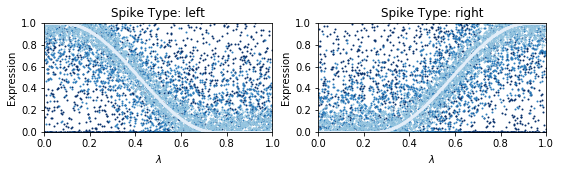

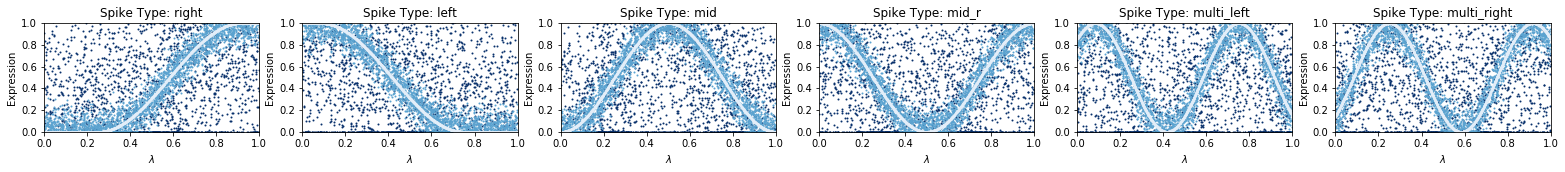

[feat_viz INFO] [ 0  4  8 12 16 20 24 28 32 36 40 44 48 52 56 60 64 68 72 76 80 84 88 92
 96]
[feat_viz INFO] {'seed': 0, 'n_samps': 1500, 'x_param': {'spike_grp': ['left', 'right'], 'n_repetitions': 1, 'rel_noise_list': [1, 0.1]}, 'y_param': {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': 4, 'rel_noise_list': [0.5]}, 'target_vars': 100, 'method': None, 'graph_k': 10, 'sim_dir': '/share/PI/sabatti/feat_viz/main_sim_strict_1', 'n_var_list': array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64,
       68, 72, 76, 80, 84, 88, 92, 96])}


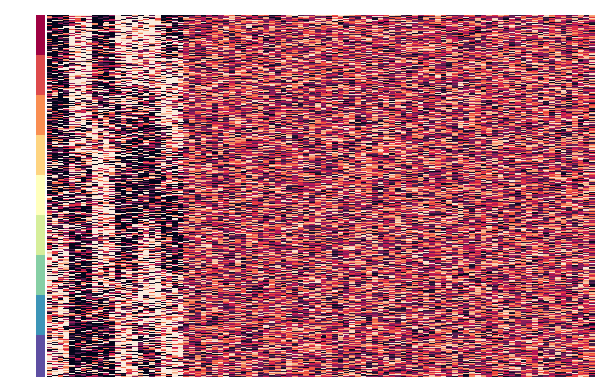

In [16]:
# Core simulation parameters
from sim_utils import get_sim_params, generate_synthetic_data
# FDIR="/scratch/users/jjzhu/20190415_featviz/simulation/latent_strict_order_recovery"
# --------------------------------------------------------------------
# REDUCE THE NUMBER OF NULL VARIABLES FOR EFFICIENCY
# params = get_sim_params("main_sim_strict_1")
# params["target_vars"] = 100
# target_vars = params["target_vars"]
# rep_unit = 1 # params["y_param"]["n_repetitions"]
# params["n_var_list"] = np.arange(0, target_vars, rep_unit).astype(int)
# --------------------------------------------------------------------
sim_params = get_sim_params("main_sim_strict_1")
plot_spike_grps(sim_params["x_param"]["spike_grp"], 
                sim_params["x_param"]["rel_noise_list"] + [1e-2, 1e-9])
#                 fn=os.path.join(FDIR, "x_struct.png"))
plot_spike_grps(sim_params["y_param"]["spike_grp"], 
                sim_params["y_param"]["rel_noise_list"] + [1e-2, 1e-9])
#                 fn=os.path.join(FDIR, "y_struct.png"))
logger.info("{}".format(sim_params["n_var_list"]))
lam, x_mtx, y_mtx, n_mtx = generate_synthetic_data(sim_params)
cand_mtx = np.concatenate([y_mtx, n_mtx], axis=1)
plot_ground_truth_heatmap(lam, cand_mtx)

In [17]:
from sim_utils import run_strict_order_analysis
sim_params["method"] = "pc"
sim_params["graph_k"] = -1
df_pc, aux_pc = run_strict_order_analysis(lam, x_mtx, y_mtx, n_mtx, sim_params)
sim_params["method"] = "graph"
sim_params["graph_k"] = 10
df_graph, aux_graph = run_strict_order_analysis(lam, x_mtx, y_mtx, n_mtx, sim_params)
df_pc["method"] = "pca"
df_graph["method"] = "graph"
df_tot = pd.concat([df_pc, df_graph])

[feat_viz INFO] {'seed': 0, 'n_samps': 1500, 'x_param': {'spike_grp': ['left', 'right'], 'n_repetitions': 1, 'rel_noise_list': [1, 0.1]}, 'y_param': {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': 4, 'rel_noise_list': [0.5]}, 'target_vars': 100, 'method': 'pc', 'graph_k': -1, 'sim_dir': '/share/PI/sabatti/feat_viz/main_sim_strict_1', 'n_var_list': array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64,
       68, 72, 76, 80, 84, 88, 92, 96])}
[feat_viz INFO] curr. score 0.846280 aug-dim: (1500, 0) 
[feat_viz INFO] curr. score 0.868583 aug-dim: (1500, 4) 
[feat_viz INFO] curr. score 0.893134 aug-dim: (1500, 8) 
[feat_viz INFO] curr. score 0.893427 aug-dim: (1500, 12) 
[feat_viz INFO] curr. score 0.893285 aug-dim: (1500, 16) 
[feat_viz INFO] curr. score 0.893685 aug-dim: (1500, 20) 
[feat_viz INFO] curr. score 0.894482 aug-dim: (1500, 24) 
[feat_viz INFO] curr. score 0.894049 aug-dim: (1500, 28) (*4 nulls)
[feat_viz INFO] 

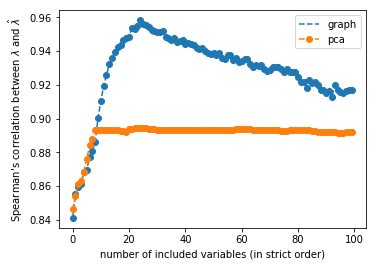

In [11]:
grouped = df_tot.groupby("method")
fig, ax = plt.subplots(figsize=(5.5,4))
for key,group in grouped:
    group.plot(x="n_cand", y="corr", label=key,
               marker="o", linestyle='dashed', ax=ax)
ax.set_xlabel("number of included variables (in strict order)")
ax.set_ylabel("Spearman's correlation between $\lambda$ and $\hat{\lambda}$")
# fn = os.path.join(FDIR, "compare_graph_pc.pdf")
# if fn:
#     plt.savefig(fn, bbox_inches='tight') 
#     logger.info("Saved figure to: {}".format(fn))    
plt.show()

### Evaluate the correlation metrics

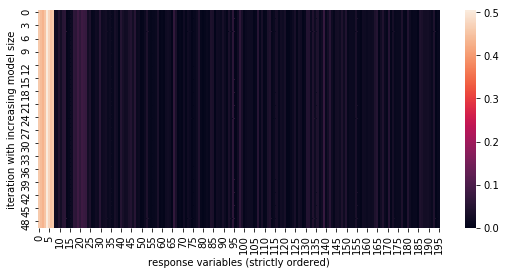

In [6]:
fig, ax = plt.subplots(figsize=(9,4))
ax = sns.heatmap(aux_pc["sel_scores"])
ax.set_ylabel("iteration with increasing model size")
ax.set_xlabel("response variables (strictly ordered)")
# fn = os.path.join(FDIR, "heatmap_pc_corr_score.png")
# plt.savefig(fn, bbox_inches='tight')
# logger.info("Saved: {}".format(fn))
plt.show()

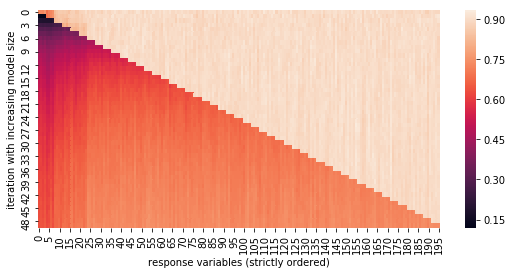

In [7]:
fig, ax = plt.subplots(figsize=(9,4))
ax = sns.heatmap(aux_graph["sel_scores"])
ax.set_ylabel("iteration with increasing model size")
ax.set_xlabel("response variables (strictly ordered)")
# fn = os.path.join(FDIR, "heatmap_graph_lap_score.png")
# plt.savefig(fn, bbox_inches='tight')
# logger.info("Saved: {}".format(fn))
plt.show()